# ML Polynomial Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial

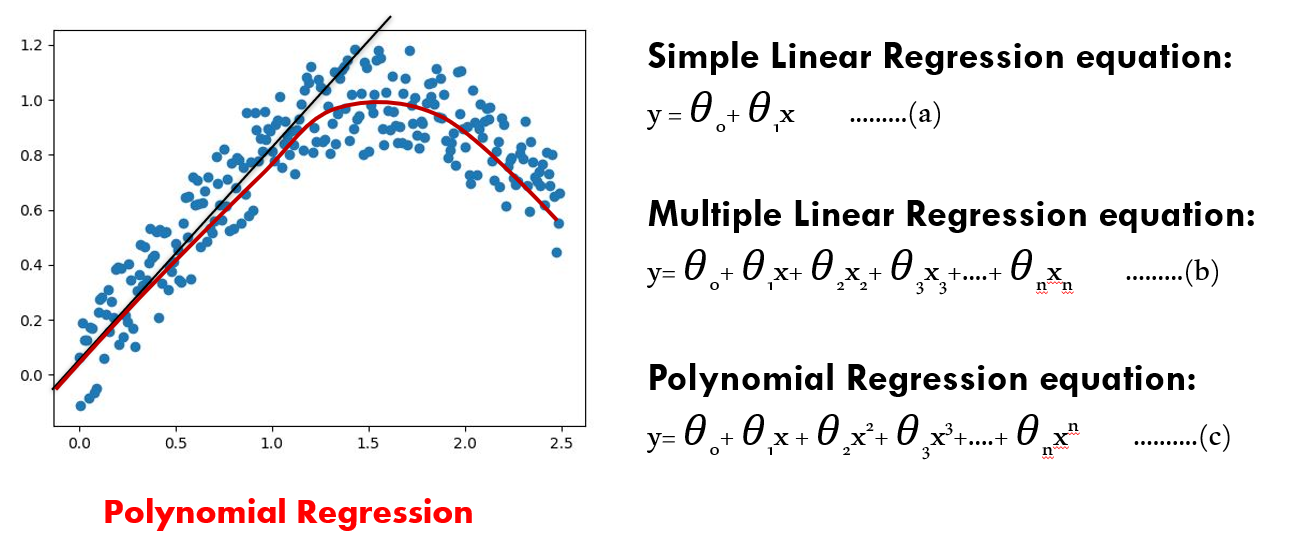

In [52]:
#Reference1: Polynomial regression malayalam: https://www.youtube.com/watch?v=3Jsew0NbYx4

It is also called the special case of Multiple Linear Regression in ML. Because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression

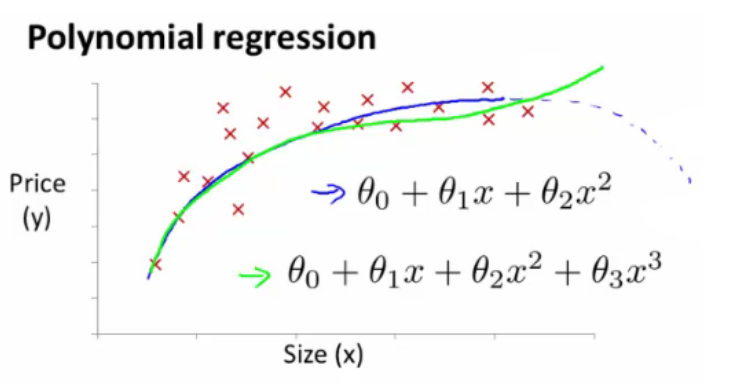

How do we fit the model to this data
To map our old linear hypothesis and cost functions to these polynomial descriptions the easy thing to do is set
- x1 = x
- x2 = x^2
- x3 = x^3
By selecting the features like this and applying the linear regression algorithms you can do polynomial linear regression
Remember, feature scaling becomes even more important here

In [53]:
#Reference2: Anderw NG class on Polynomial regression: https://www.youtube.com/watch?v=3Jsew0NbYx4
#Reference3: Feature scaling Introduction malayalam:https://www.youtube.com/watch?v=7b7UargPUGk

# Cost Function & Gradient Descent

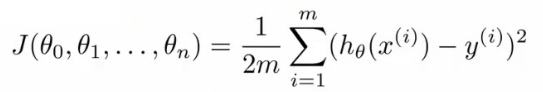

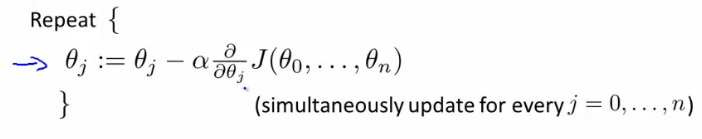

In [54]:
#Reference4: https://www.youtube.com/watch?v=m78iW-zCN6Y

# Example: Predicting corona Cases 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [56]:
cd "F:\Knowledge\ML\courses_ML\Content\My_codes\ML_Core\Polynomial regression"

F:\Knowledge\ML\courses_ML\Content\My_codes\ML_Core\Polynomial regression


In [ ]:
#Data download: https://dashboard.kerala.gov.in/covid/dailyreporting-view-public-districtwise.php

In [57]:
###Step-1:LOAD DATA ####
data = pd.read_csv('coronaCases.csv',sep =',')
data = data[['Id','Confirmed']]
print('-'*30);print('HEAD');print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   Id  Confirmed
0   1       6334
1   2       6753
2   3       6960
3   4       6036
4   5       3361


------------------------------
PREPARE DATA
------------------------------


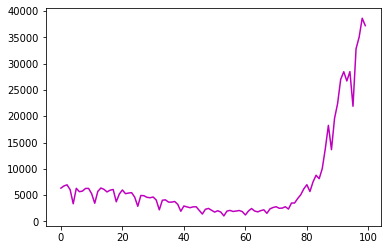

In [58]:
#### Step-2:PREPARE DATA ####
print('-'*30);print('PREPARE DATA');print('-'*30)
x = np.array(data['Id']).reshape(-1, 1)
y = np.array(data['Confirmed']).reshape(-1, 1)
plt.plot(y,'-m')
#plt.show()
polyFeat = PolynomialFeatures(degree=3)
x = polyFeat.fit_transform(x)
#print(x)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

------------------------------
TRAINING DATA
------------------------------
Accuracy:94.184 %


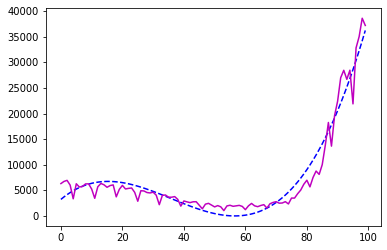

In [59]:
#### Step-3:TRAINING DATA ####
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0,'--b')
plt.plot(y,'-m')
plt.show()

In [67]:
#### Step-4:PREDICTION ####
Add_days = 4
cur_day= y.shape[0]
pred_day =cur_day+Add_days
X_poly_fit=polyFeat.fit_transform([[pred_day]])
y_pred =model.predict(X_poly_fit)
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {Add_days} days:',end='')
print(round(int(y_pred)/1000,2),'Thousdands')

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 4 days:45.03 Thousdands


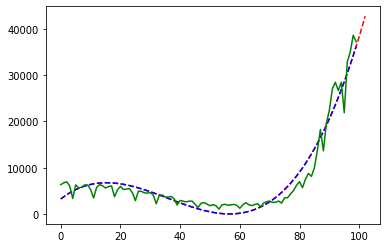

In [68]:
x1 = np.array(list(range(1,pred_day))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.plot(y,'-g')
plt.show()